# ME 581 Midterm Exam Solution (Python3)
Yi Yang @ (yang1087@purdue.edu), all rights reserved.

# Problem 1
The function $f(x) = 2x^4 - 12x^2 + 16x - 6$ is plotted below. The function has a root at $x = 1$.

(a) Find an approximation of the root by performing 10 iterations of Newton's method, beginning with an initial guess of $x_0 = 0$. Print and plot the value of $x_i$ versus the iteration number $i$.

(b) Plot the absolute error $e_i = |x_{i+1} - x_i|$ versus the iteration number $i$.

(c) Determine the order of convergence and explain if you expected this order.

(d) Perform 10 iterations using the bisection method starting in an interval $[0,3]$. Compute the order of convergence with the one in Newton's method.

(e) A further root exist at $x = -3$. Perform 10 iterations using Newton's method, beginning with an initial guess of $x_0 = -4$. Print and plot the value of $x_i$ versus the iteration number $i$.

(f) What order of convergence do you find for this root? Why?

$\textbf{Solution:}$ 

(a) The code for performming 10 iterations of Newton's method is shown below:

**ME 581 Midterm Printout**

Newton's method is applied to function.
Root Estimate #1: p(1) =         0.37500
Root Estimate #2: p(2) =         0.59704
Root Estimate #3: p(3) =         0.73657
Root Estimate #4: p(4) =         0.82649
Root Estimate #5: p(5) =         0.88522
Root Estimate #6: p(6) =         0.92386
Root Estimate #7: p(7) =         0.94940
Root Estimate #8: p(8) =         0.96634
Root Estimate #9: p(9) =         0.97759
Root Estimate #10: p(10) =         0.98508
The maximum number of 10 iterations     has been met.



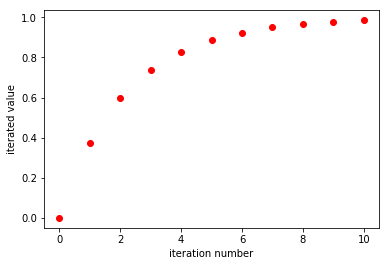

In [3]:
import numpy as np
from matplotlib import pyplot as plt

print('**ME 581 Midterm Printout**\n')
print('Newton\'s method is applied to function.')

# function definition
def f(x):
    var = 2.*x**4. - 12.*x**2. + 16.*x - 6.
    return var
# first derivative definition
def df(x):
    var = 8.*x**3. - 24.*x + 16.
    return var
epsilon = 0.000001
Nmax = 10
# array to save iterated values
p = np.zeros(Nmax+1)
# array to save error
err = np.zeros(Nmax)
#err42 = np.zeros(Nmax4+1)
# set the initial iterated value
p[0] = 0.
#err42[0] = np.abs(p4[0]-3.0**(1.0/7))
# now begin iteration
for ind in range(0,Nmax):
    if (df(p[ind]) == 0.0):
        print('Choose another starting point')
        break
    else:
        p[ind+1] = p[ind] - f(p[ind])/df(p[ind])
        err[ind] = np.abs(p[ind+1] - p[ind])
        #err42[ind4+1] = np.abs(p4[ind4+1] - 3.0**(1.0/7))
        if (err[ind] < (2*epsilon)):
            print("Root Estimate #{0:1d}: p({1:1d}) = \
            {2:6.5f}".format(ind+1,ind+1,p[ind+1]))
            print("The convergence tolerance has been met")
            break
        print("Root Estimate #{0:1d}: p({1:1d}) = \
        {2:6.5f}".format(ind+1,ind+1,p[ind+1]))
if (ind >= (Nmax-1)):
    print('The maximum number of {0:1d} iterations \
    has been met.\n'.format(Nmax))
plt.figure(1)
plt.plot(np.arange(11),p,'ro',label='iterated value')
#plt.legend()
plt.xlabel('iteration number')
plt.ylabel('iterated value')
plt.show()

(b) The absolute error $e_i = |x_{i+1} - x_i|$ versus the iteration number $i$ are shown below:

**ME 581 Midterm Printout**

iteration number vs absolute error:
Error Estimate #1: |p1-p0|     = 0.37500
Error Estimate #2: |p2-p1|     = 0.22204
Error Estimate #3: |p3-p2|     = 0.13953
Error Estimate #4: |p4-p3|     = 0.08992
Error Estimate #5: |p5-p4|     = 0.05872
Error Estimate #6: |p6-p5|     = 0.03864
Error Estimate #7: |p7-p6|     = 0.02555
Error Estimate #8: |p8-p7|     = 0.01694
Error Estimate #9: |p9-p8|     = 0.01125
Error Estimate #10: |p10-p9|     = 0.00748


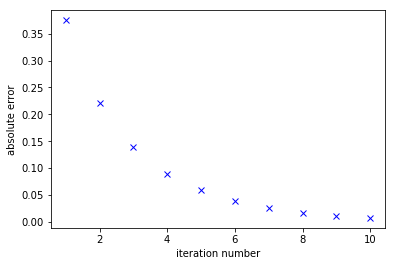

In [5]:
print('**ME 581 Midterm Printout**\n')
print('iteration number vs absolute error:')
for ii in range(0,Nmax):
    print("Error Estimate #{0:1d}: |p{1:d}-p{2:d}| \
    = {3:6.5f}".format(ii+1,ii+1,ii,err[ii]))
plt.figure(2)
plt.plot(np.arange(1,11),err,'bx')
plt.xlabel('iteration number')
plt.ylabel('absolute error')
plt.show()

(c) define function 
$$g(x) = x - \frac{f(x)}{f'(x)} = \frac{6x^4 - 12x^2 + 6}{8x^3 - 24x + 16}$$
$g'(x) \neq 0$, the order of convergence is expected to be 1. The actual value of order of convergence is 1 shown below, which is aligned with the expected one.

In [13]:
from scipy.stats import linregress
a1 = linregress(np.log(abs(p[:-1]-np.ones(10))),np.log(abs(p[1:]-np.ones(10))))
a2 = linregress(np.log(err[:-1]),np.log(err[1:]))
print(a1)
print(a2)

LinregressResult(slope=0.98663032948952933, intercept=-0.44638629324803203, rvalue=0.99996202728418837, pvalue=9.095883802452025e-18, stderr=0.0030399935655411911)
LinregressResult(slope=0.97244891621880913, intercept=-0.51201769840627165, rvalue=0.99985642888984105, pvalue=1.1673769916990202e-13, stderr=0.0062289245702035183)


(d) The code using bisection methods is shown below, the order of convergence using bisection method is also 1, which is equal to Newton's method starting from 0 point.

In [17]:
print('**ME 581 Midterm Printout\n**')
a3 = 0.
b3 = 3.
epsilon3 = 0.000005
Nmax3 = 10
p3 = np.zeros(Nmax3)
p3.fill(np.nan)
ii3 = 1
sfa3 = np.sign( f( a3 ) )
for ii3 in range(0,Nmax3):
   p3[ii3] = a3 + (b3-a3)/2
   if ( (b3-a3) < (2*epsilon3) ):
      print("Root Estimate #{0:d}: p({1:d}) = \
            {2:6.5f}".format(ii3+1,ii3+1,p3[ii3]))
      print("The convergence tolerance has been met.")
      break
   print("Root Estimate #{0:d}: p({1:d}) = \
         {2:6.5f}".format(ii3+1,ii3+1,p3[ii3]))
   sfp3 = np.sign( f( p3[ii3] ) );
   if ( (sfa3*sfp3) < 0.0 ):
      b3 = p3[ii3]
   else:
      a3 = p3[ii3]
      sfa3 = sfp3
if (ii3 >= (Nmax3-1)):
   print("The maximum number of {0:1d} iterations \
         has been met.\n".format(Nmax3))
print('**Error Printout**\n')
error_pb3 = np.zeros(ii3+1)
error_pb3.fill(np.nan)
for ind3, pact3 in enumerate(p3[0:ii3+1]):
    error_pb3[ind3] = np.abs(pact3 - 1.0)
    print("Error Estimate #{0:d}: err({1:d}) = {2:6.5f}".format(ind3+1,ind3+1,error_pb3[ind3]))
print('**Linear regression to approximate order of convergence:**')
print(linregress(np.log(error_pb3[:-1]),np.log(error_pb3[1:])))

**ME 581 Midterm Printout
**
Root Estimate #1: p(1) =          1.50000
Root Estimate #2: p(2) =          0.75000
Root Estimate #3: p(3) =          1.12500
Root Estimate #4: p(4) =          0.93750
Root Estimate #5: p(5) =          1.03125
Root Estimate #6: p(6) =          0.98438
Root Estimate #7: p(7) =          1.00781
Root Estimate #8: p(8) =          0.99609
Root Estimate #9: p(9) =          1.00195
Root Estimate #10: p(10) =          0.99902
The maximum number of 10 iterations          has been met.

**Error Printout**

Error Estimate #1: err(1) = 0.50000
Error Estimate #2: err(2) = 0.25000
Error Estimate #3: err(3) = 0.12500
Error Estimate #4: err(4) = 0.06250
Error Estimate #5: err(5) = 0.03125
Error Estimate #6: err(6) = 0.01562
Error Estimate #7: err(7) = 0.00781
Error Estimate #8: err(8) = 0.00391
Error Estimate #9: err(9) = 0.00195
Error Estimate #10: err(10) = 0.00098
**Linear regression to approximate order of convergence:**
LinregressResult(slope=1.0, intercept=-0.6931471

(e) The code using Newton's method is shown below, the iteration terminates when tolerance attained.

Root Estimate #1: p(1) =         -3.37500000000000000000000000000000000000000000000000
Root Estimate #2: p(2) =         -3.07670454545454541417370819544885307550430297851562
Root Estimate #3: p(3) =         -3.00409832993523639999011720647104084491729736328125
Root Estimate #4: p(4) =         -3.00001254581430698564759040891658514738082885742188
Root Estimate #5: p(5) =         -3.00000000011804646149471409444231539964675903320312
Root Estimate #6: p(6) =         -3.00000000000000000000000000000000000000000000000000
Root Estimate #7: p(7) =             -3.00000000000000000000000000000000000000000000000000
The convergence tolerance has been met


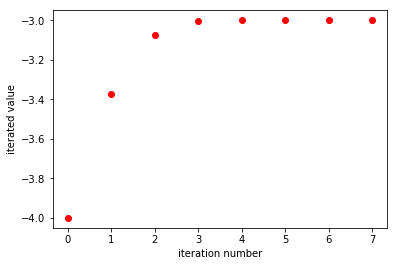

In [28]:
epsilon4 = 1.e-50
Nmax4 = 10
# array to save iterated values
p4 = np.zeros(Nmax4+1)
# array to save error
err4 = np.zeros(Nmax4)
#err42 = np.zeros(Nmax4+1)
# set the initial iterated value
p4[0] = -4.
#err42[0] = np.abs(p4[0]-3.0**(1.0/7))
# now begin iteration
for ind4 in range(0,Nmax4):
    if (df(p4[ind4]) == 0.0):
        print('Choose another starting point')
        break
    else:
        p4[ind4+1] = p4[ind4] - f(p4[ind4])/df(p4[ind4])
        err4[ind4] = np.abs(p4[ind4+1] - p4[ind4])
        #err42[ind4+1] = np.abs(p4[ind4+1] - 3.0**(1.0/7))
        if (err4[ind4] < (2*epsilon4)):
            print("Root Estimate #{0:1d}: p({1:1d}) = \
            {2:51.50f}".format(ind4+1,ind4+1,p4[ind4+1]))
            print("The convergence tolerance has been met")
            break
        print("Root Estimate #{0:1d}: p({1:1d}) = \
        {2:51.50f}".format(ind4+1,ind4+1,p4[ind4+1]))
if (ind4 >= (Nmax4-1)):
    print('The maximum number of {0:1d} iterations \
    has been met.\n'.format(Nmax4))
plt.figure(3)
plt.plot(np.arange(ind4+2),p4[:ind4+2],'ro',label='iterated value')
#plt.legend()
plt.xlabel('iteration number')
plt.ylabel('iterated value')
plt.show()

(f) According to fixed point contraction theorem, we analyze the function $g(x) = x - \tfrac{f(x)}{f'(x)}$.
$$g'(x) = \frac{f(x)f''(x)}{f'(x)^2}$$
For the new zero point, $f'(-3)\neq 0$ and $g'(-3) = 0$. We also have,
$$g''(s) = \frac{f''(s)}{f'(s)} = \frac{24s^2-24}{8s^3-24s+16} = -1.5\neq 0$$
Theoretically, we prove that using Newton's method to solve for the new zero point $x_0 = -3$ has order of convergence equal to 2, as evaluated by the code below.

In [32]:
print(linregress(np.log(err4[:ind4-1]),np.log(err4[1:ind4])))

LinregressResult(slope=2.0048018852656799, intercept=-0.23998394476313578, rvalue=0.99999521634242416, pvalue=1.255953823439472e-08, stderr=0.0035802011922991522)


## Problem 2
The matrix R summarizes the correlations among speeds for the 100m, 200m, 400m, 800m, 1500m, 5000m, 10000m, and marathon events extracted from Olympic track records.
$$R = \begin{pmatrix}
1.00 & 0.91 & 0.82 & 0.70 & 0.69 & 0.60 & 0.70 & 0.50\\
0.91 & 1.00 & 0.85 & 0.80 & 0.77 & 0.60 & 0.69 & 0.60\\
0.82 & 0.85 & 1.00 & 0.90 & 0.83 & 0.77 & 0.78 & 0.67\\
0.70 & 0.80 & 0.90 & 1.00 & 0.97 & 0.85 & 0.87 & 0.79\\
0.69 & 0.77 & 0.83 & 0.97 & 1.00 & 0.92 & 0.95 & 0.80\\
0.60 & 0.60 & 0.77 & 0.85 & 0.92 & 1.00 & 0.97 & 0.92\\
0.70 & 0.69 & 0.78 & 0.87 & 0.95 & 0.97 & 1.00 & 0.94\\
0.50 & 0.60 & 0.67 & 0.79 & 0.80 & 0.92 & 0.94 & 1.00
\end{pmatrix}$$
The events in the matrix are provided in the order 100m, 200m, 400m, 800m, 1500m, 5000m, 10000m, and marathon. The eigenvector associated with the largest eigenvalue of R is called the principle component. Further, the percentage of variation accounted for by the principle component is given by the ratio of the corresponding eigenvalue and the number of variables (8 in this case).

(a) Perform 10 iterations uisng the power method to calculate the largest eigenvalue of R and the principle component, beginning with an initial guess of $x_0 = [1,1,1,1,1,1,1,1]^T$. Normalize the eigenvector using the $L_2$ norm.

(b) Calculate the percentage of variation accounted for by the principle component.

$\textbf{Solution:}$ 

(a) Perform 10 iterations using the power method is shown below:

In [36]:
# power method function definition
def eig_power(A,v0,Nmax):
    # A is the matrix
    # v0 is the initial eigenvector
    # Nmax is the maximum iteration number
    Lambda = np.zeros(Nmax)
    v = np.zeros((Nmax+1, v0.shape[0]))
    conv = np.zeros(Nmax-1)
    v[0] = np.copy(v0)
    for i in range(Nmax):
        v[i+1] = np.dot(A,v[i])
        Lambda[i] = np.linalg.norm(v[i+1],2)/np.linalg.norm(v[i],2)
    conv = abs(Lambda[1:] - Lambda[:-1])
    v = v/np.linalg.norm(v,2)
    return v, Lambda, conv

R = np.array([[1.00, 0.91, 0.82, 0.70, 0.69, 0.60, 0.70, 0.50], \
              [0.91, 1.00, 0.85, 0.80, 0.77, 0.60, 0.69, 0.60], \
              [0.82, 0.85, 1.00, 0.90, 0.83, 0.77, 0.78, 0.67], \
              [0.70, 0.80, 0.90, 1.00, 0.97, 0.85, 0.87, 0.79], \
              [0.69, 0.77, 0.83, 0.97, 1.00, 0.92, 0.95, 0.80], \
              [0.60, 0.60, 0.77, 0.85, 0.92, 1.00, 0.97, 0.92], \
              [0.70, 0.69, 0.78, 0.87, 0.95, 0.97, 1.00, 0.94], \
              [0.50, 0.60, 0.67, 0.79, 0.80, 0.92, 0.94, 1.00]])
x0 = np.array([1, 1, 1, 1, 1, 1, 1, 1])
v2, Lambda2, conv2 = eig_power(R,x0,10)
print("**ME 581 Midterm Printout**\n")
np.set_printoptions(precision=6)
print("(a) The final values of the estimated vector is ", v2[10])
print("(a) The final estimated eigenvalue is ", Lambda2[9])
#print("(a) The final estimated value of convergence is ", conv2[8])
#ww1,vv1 = np.linalg.eig(R)
#print(ww1,vv1)

**ME 581 Midterm Printout**

(a) The final values of the estimated vector is  [ 0.312954  0.329436  0.352487  0.367886  0.370951  0.35519   0.368913
  0.332939]
(a) The final estimated eigenvalue is  6.56032996429


(b) By its definition, the percentage of variation accounted for by the principal component is 
$$PoV = \frac{\lambda_1}{8} = \frac{6.56033}{8} = 0.82$$